## Agentes

Use la clase agente para modelar el último escenario, suponga únicamente combate cuerpo a cuerpo, asigne una probabilidad de herir, morir y matar para los agentes que estén uno enfrente de otro. Agregue un valor de cohesión / miedo. Si pasa de un límite el miedo huye el agente. Agregue un atributo de moral. ¿Los resultados coinciden con el modelo de Lanchester?

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [152]:
class Agente:
    def __init__(self, tipo, limite_m, max_dist, locacion = np.array([0,0])):
        self.tipo = tipo
        self.limite_m = limite_m
        self.max_dist = max_dist
        self.locacion = locacion
        self.siguiente_accion = None
        self.miedo = 0
        self.moralidad = 0
    
    def miedo(self):
        self.miedo = random.uniform(0,1)
        
    def moralidad(self):
        self.moralidad = random.uniform(0,1)
    
    def distancia(self, otro):
        otro_locacion = np.array([random.uniform(0, 1), random.uniform(0, 1)])
        return np.linalg.norm(self.locacion - otro_locacion)
    
    def morir(self):
        self.tipo = 3
        
    def matar(self, otro):
        otro.pop()
    
    def herir(self, otro):
        otro.pop()
    
    def actuar(self,otro):
        
        p1 = [1,2,3,4]
        p2 = [1,2,3]
        
        if self.distancia(otro) < self.max_dist:
            if self.miedo < self.limite_m:
                if self.moralidad < 0.5:
                    accion = random.choice(p1)
                    if accion <= 2:
                        self.matar(otro)
                    elif accion == 3:
                        self.herir(otro)
                    else:
                        self.morir()
                elif self.moralidad == 0.5:
                    accion = random.choice(p2)
                    if accion == 1:
                        self.matar(otro)
                    elif accion == 2:
                        self.herir(otro)
                    else:
                        self.morir()
                else:
                    accion = random.choice(p2)
                    if accion <= 2:
                        self.morir()
                    elif accion == 3:
                        self.herir(otro)
                    else:
                        self.matar(otro)
                self.locacion = self.moverse()
            else:
                self.locacion = self.moverse()
        else:
            self.locacion = self.moverse()
            
    def moverse(self):
        self.siguiente_accion = np.array([random.uniform(0, 1), random.uniform(0, 1)])
        return self.siguiente_accion
        
    def actualizar(self, agentes):
        self.actuar(agentes)

In [161]:
class Mundo:
    def __init__(self, agentes, ancho=8, alto=8, steps = 10):
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        self.agentes = agentes
        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos, = self.ax.plot([], [], 'o', **plot_args)
       
       
    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        for agente in self.agentes:
            x, y = agente.locacion
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Paso {}'.format(step))
        
        return self.puntos,
       
    def actualizar(self, step):   
        self.dibujar(step) # Dibuja el mundo
        
        for agente in self.agentes:
            agente.actualizar(self.agentes)
    
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos,
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func=self.clean_screen, frames=self.steps, interval=1000, blit=False)
        return anim

In [169]:
class Batalla(Mundo):

    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos_0, = self.ax.plot([], [], 'o', markerfacecolor='blue', **plot_args)
        self.puntos_1, = self.ax.plot([], [], 'o', markerfacecolor='red', **plot_args)
    
    def clean_screen(self):
        self.puntos_0.set_data([], [])
        self.puntos_1.set_data([], [])
        return 
    
    def dibujar(self,step):
   
        x_values_0, y_values_0 = [], []
        x_values_1, y_values_1 = [], []
    
        for agente in self.agentes:
            x, y = agente.locacion
            if agente.tipo == 0:
                x_values_0.append(x)
                y_values_0.append(y)
            else:
                x_values_1.append(x)
                y_values_1.append(y)

                
        self.puntos_0.set_data(x_values_0, y_values_0)
        self.puntos_1.set_data(x_values_1, y_values_1)
        
        self.ax.set_title('Paso {}'.format(step))

        return 

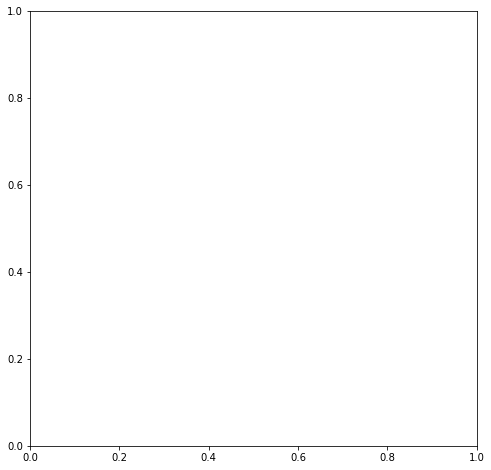

In [170]:
no_rojos = 1000
no_azules = 1000

#agentes1 = list(range(no_rojos))
#otros1 = list(range(no_azules))



agentes1 = [Agente(tipo = 0, limite_m = 0.5,max_dist = 2) for i in range(no_rojos)]
agentes1.extend(Agente(tipo = 1, limite_m = 0.3, max_dist = 2) for i in range(no_azules))

batalla = Batalla(agentes = agentes1)

simular_batalla = batalla.simular()

In [171]:
HTML(simular_batalla.to_html5_video())